In [1]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging

# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [2]:
# BATCH_SIZE = 64
# window_size = 6
# prediction_horizon = 6
# target_col = 'value'

# input_folder = 'data/ohio-data/processed'
# output_folder_train = 'data/ohio-data/processed/cleaned'  # Create a subfolder for processed files
# output_folder_test = 'data/ohio-data/processed/cleaned_test'
scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [3]:
model_type = 'shared-layer'
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']

# train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon,
#                                                                                     model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)


In [4]:
# prediction_horizons = [15,30,60,90,120,150,180]
# prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
prediction_horizons = [6]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [5]:
# train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon,
#                                                                                     model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
    

In [ ]:
for prediction_horizon in prediction_horizons:
    logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
    print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
   
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon,
                                                                                    model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
    
    # model = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
    # model = model.to(device)
    # model, history = train_model(model, train_loader, val_loader = validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
    # histories_withval_PHs[prediction_horizon] = history

    model_all_train = SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape) 
    model_all_train = model_all_train.to(device)
    model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=200, learning_rate=0.00001, model_type = model_type)
    histories_noval_PHs[prediction_horizon] = history2


    model_all_train.eval()
    each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


    # logger.info(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {mae}")
    # logger.info(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {rmse}")
    # print(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {mae}")
    # print(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {rmse}")

    
    abs_patients_errors_PHs[prediction_horizon] = each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = each_patient_rmse
    # MAE_Patients_PHs[prediction_horizon] = mae
    # RMSE_Patients_PHs[prediction_horizon] = rmse


    logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
    print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
    torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}.pth')
    print(f"model_{model_type}_attention_{str(prediction_horizon)} saved")
    logger.info(f"model_{model_type}_attention_{str(prediction_horizon)} saved")


Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13618, 6)
Shape of y (targets): (12, 13618)
Shape of X_test (features): (12, 3939, 6)
Shape of y_test (targets): (12, 3939)


Epoch 1/200: 100%|██████████| 213/213 [00:24<00:00,  8.83batch/s, mae_loss=0.669]


Epoch [1/200], Training MAE: 0.6622, Training RMSE: 0.9068
Epoch [1/200], Validation MAE: 0.5358, Validation RMSE: 0.8134


Epoch 2/200: 100%|██████████| 213/213 [00:21<00:00,  9.82batch/s, mae_loss=0.653]


Epoch [2/200], Training MAE: 0.6581, Training RMSE: 0.9026
Epoch [2/200], Validation MAE: 0.5324, Validation RMSE: 0.8087


Epoch 3/200: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.625]


Epoch [3/200], Training MAE: 0.6511, Training RMSE: 0.8935
Epoch [3/200], Validation MAE: 0.5253, Validation RMSE: 0.7973


Epoch 4/200: 100%|██████████| 213/213 [00:19<00:00, 11.04batch/s, mae_loss=0.606]


Epoch [4/200], Training MAE: 0.6341, Training RMSE: 0.8716
Epoch [4/200], Validation MAE: 0.5062, Validation RMSE: 0.7691


Epoch 5/200: 100%|██████████| 213/213 [00:20<00:00, 10.49batch/s, mae_loss=0.61] 


Epoch [5/200], Training MAE: 0.5960, Training RMSE: 0.8239
Epoch [5/200], Validation MAE: 0.4661, Validation RMSE: 0.7111


Epoch 6/200: 100%|██████████| 213/213 [00:19<00:00, 11.06batch/s, mae_loss=0.511]


Epoch [6/200], Training MAE: 0.5282, Training RMSE: 0.7406
Epoch [6/200], Validation MAE: 0.4074, Validation RMSE: 0.6251


Epoch 7/200: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.423]


Epoch [7/200], Training MAE: 0.4540, Training RMSE: 0.6466
Epoch [7/200], Validation MAE: 0.3520, Validation RMSE: 0.5435


Epoch 8/200: 100%|██████████| 213/213 [00:22<00:00,  9.65batch/s, mae_loss=0.427]


Epoch [8/200], Training MAE: 0.4048, Training RMSE: 0.5809
Epoch [8/200], Validation MAE: 0.3199, Validation RMSE: 0.4965


Epoch 9/200: 100%|██████████| 213/213 [00:20<00:00, 10.36batch/s, mae_loss=0.356]


Epoch [9/200], Training MAE: 0.3831, Training RMSE: 0.5503
Epoch [9/200], Validation MAE: 0.3037, Validation RMSE: 0.4747


Epoch 10/200: 100%|██████████| 213/213 [00:23<00:00,  9.03batch/s, mae_loss=0.407]


Epoch [10/200], Training MAE: 0.3718, Training RMSE: 0.5348
Epoch [10/200], Validation MAE: 0.2935, Validation RMSE: 0.4615


Epoch 11/200: 100%|██████████| 213/213 [00:18<00:00, 11.45batch/s, mae_loss=0.359]


Epoch [11/200], Training MAE: 0.3639, Training RMSE: 0.5234
Epoch [11/200], Validation MAE: 0.2862, Validation RMSE: 0.4517


Epoch 12/200: 100%|██████████| 213/213 [00:18<00:00, 11.22batch/s, mae_loss=0.36] 


Epoch [12/200], Training MAE: 0.3563, Training RMSE: 0.5132
Epoch [12/200], Validation MAE: 0.2793, Validation RMSE: 0.4423


Epoch 13/200: 100%|██████████| 213/213 [00:19<00:00, 11.20batch/s, mae_loss=0.367]


Epoch [13/200], Training MAE: 0.3488, Training RMSE: 0.5026
Epoch [13/200], Validation MAE: 0.2734, Validation RMSE: 0.4331


Epoch 14/200: 100%|██████████| 213/213 [00:19<00:00, 11.10batch/s, mae_loss=0.329]


Epoch [14/200], Training MAE: 0.3416, Training RMSE: 0.4936
Epoch [14/200], Validation MAE: 0.2670, Validation RMSE: 0.4240


Epoch 15/200: 100%|██████████| 213/213 [00:18<00:00, 11.48batch/s, mae_loss=0.332]


Epoch [15/200], Training MAE: 0.3356, Training RMSE: 0.4853
Epoch [15/200], Validation MAE: 0.2606, Validation RMSE: 0.4147


Epoch 16/200: 100%|██████████| 213/213 [00:18<00:00, 11.54batch/s, mae_loss=0.343]


Epoch [16/200], Training MAE: 0.3282, Training RMSE: 0.4755
Epoch [16/200], Validation MAE: 0.2548, Validation RMSE: 0.4064


Epoch 17/200: 100%|██████████| 213/213 [00:19<00:00, 10.98batch/s, mae_loss=0.326]


Epoch [17/200], Training MAE: 0.3214, Training RMSE: 0.4666
Epoch [17/200], Validation MAE: 0.2486, Validation RMSE: 0.3981


Epoch 18/200: 100%|██████████| 213/213 [00:19<00:00, 11.18batch/s, mae_loss=0.287]


Epoch [18/200], Training MAE: 0.3149, Training RMSE: 0.4579
Epoch [18/200], Validation MAE: 0.2430, Validation RMSE: 0.3906


Epoch 19/200: 100%|██████████| 213/213 [00:17<00:00, 12.37batch/s, mae_loss=0.318]


Epoch [19/200], Training MAE: 0.3095, Training RMSE: 0.4514
Epoch [19/200], Validation MAE: 0.2375, Validation RMSE: 0.3834


Epoch 20/200: 100%|██████████| 213/213 [00:18<00:00, 11.72batch/s, mae_loss=0.308]


Epoch [20/200], Training MAE: 0.3041, Training RMSE: 0.4450
Epoch [20/200], Validation MAE: 0.2340, Validation RMSE: 0.3773


Epoch 21/200: 100%|██████████| 213/213 [00:16<00:00, 12.63batch/s, mae_loss=0.274]


Epoch [21/200], Training MAE: 0.2997, Training RMSE: 0.4391
Epoch [21/200], Validation MAE: 0.2292, Validation RMSE: 0.3718


Epoch 22/200: 100%|██████████| 213/213 [00:19<00:00, 11.06batch/s, mae_loss=0.273]


Epoch [22/200], Training MAE: 0.2962, Training RMSE: 0.4347
Epoch [22/200], Validation MAE: 0.2261, Validation RMSE: 0.3674


Epoch 23/200: 100%|██████████| 213/213 [00:20<00:00, 10.35batch/s, mae_loss=0.277]


Epoch [23/200], Training MAE: 0.2925, Training RMSE: 0.4310
Epoch [23/200], Validation MAE: 0.2239, Validation RMSE: 0.3642


Epoch 24/200: 100%|██████████| 213/213 [00:18<00:00, 11.35batch/s, mae_loss=0.285]


Epoch [24/200], Training MAE: 0.2898, Training RMSE: 0.4275
Epoch [24/200], Validation MAE: 0.2217, Validation RMSE: 0.3620


Epoch 25/200: 100%|██████████| 213/213 [00:18<00:00, 11.25batch/s, mae_loss=0.291]


Epoch [25/200], Training MAE: 0.2875, Training RMSE: 0.4256
Epoch [25/200], Validation MAE: 0.2193, Validation RMSE: 0.3592


Epoch 26/200: 100%|██████████| 213/213 [00:17<00:00, 11.87batch/s, mae_loss=0.282]


Epoch [26/200], Training MAE: 0.2854, Training RMSE: 0.4232
Epoch [26/200], Validation MAE: 0.2175, Validation RMSE: 0.3576


Epoch 27/200: 100%|██████████| 213/213 [00:17<00:00, 12.24batch/s, mae_loss=0.247]


Epoch [27/200], Training MAE: 0.2835, Training RMSE: 0.4218
Epoch [27/200], Validation MAE: 0.2159, Validation RMSE: 0.3557


Epoch 28/200: 100%|██████████| 213/213 [00:17<00:00, 11.95batch/s, mae_loss=0.295]


Epoch [28/200], Training MAE: 0.2823, Training RMSE: 0.4207
Epoch [28/200], Validation MAE: 0.2151, Validation RMSE: 0.3546


Epoch 29/200: 100%|██████████| 213/213 [00:19<00:00, 10.78batch/s, mae_loss=0.263]


Epoch [29/200], Training MAE: 0.2809, Training RMSE: 0.4193
Epoch [29/200], Validation MAE: 0.2148, Validation RMSE: 0.3538


Epoch 30/200: 100%|██████████| 213/213 [00:19<00:00, 10.68batch/s, mae_loss=0.275]


Epoch [30/200], Training MAE: 0.2799, Training RMSE: 0.4187
Epoch [30/200], Validation MAE: 0.2138, Validation RMSE: 0.3528


Epoch 31/200: 100%|██████████| 213/213 [00:18<00:00, 11.62batch/s, mae_loss=0.254]


Epoch [31/200], Training MAE: 0.2788, Training RMSE: 0.4180
Epoch [31/200], Validation MAE: 0.2121, Validation RMSE: 0.3521


Epoch 32/200: 100%|██████████| 213/213 [00:23<00:00,  9.06batch/s, mae_loss=0.265]


Epoch [32/200], Training MAE: 0.2779, Training RMSE: 0.4169
Epoch [32/200], Validation MAE: 0.2119, Validation RMSE: 0.3513


Epoch 33/200: 100%|██████████| 213/213 [00:27<00:00,  7.88batch/s, mae_loss=0.289]


Epoch [33/200], Training MAE: 0.2773, Training RMSE: 0.4169
Epoch [33/200], Validation MAE: 0.2116, Validation RMSE: 0.3509


Epoch 34/200: 100%|██████████| 213/213 [00:35<00:00,  6.01batch/s, mae_loss=0.294]


Epoch [34/200], Training MAE: 0.2764, Training RMSE: 0.4156
Epoch [34/200], Validation MAE: 0.2103, Validation RMSE: 0.3504


Epoch 35/200: 100%|██████████| 213/213 [00:37<00:00,  5.66batch/s, mae_loss=0.26] 


Epoch [35/200], Training MAE: 0.2754, Training RMSE: 0.4148
Epoch [35/200], Validation MAE: 0.2100, Validation RMSE: 0.3497


Epoch 36/200: 100%|██████████| 213/213 [00:27<00:00,  7.62batch/s, mae_loss=0.289]


Epoch [36/200], Training MAE: 0.2747, Training RMSE: 0.4142
Epoch [36/200], Validation MAE: 0.2100, Validation RMSE: 0.3495


Epoch 37/200: 100%|██████████| 213/213 [00:19<00:00, 10.93batch/s, mae_loss=0.27] 


Epoch [37/200], Training MAE: 0.2739, Training RMSE: 0.4133
Epoch [37/200], Validation MAE: 0.2093, Validation RMSE: 0.3488


Epoch 38/200: 100%|██████████| 213/213 [00:20<00:00, 10.54batch/s, mae_loss=0.271]


Epoch [38/200], Training MAE: 0.2736, Training RMSE: 0.4132
Epoch [38/200], Validation MAE: 0.2085, Validation RMSE: 0.3479


Epoch 39/200: 100%|██████████| 213/213 [00:17<00:00, 11.99batch/s, mae_loss=0.261]


Epoch [39/200], Training MAE: 0.2730, Training RMSE: 0.4125
Epoch [39/200], Validation MAE: 0.2083, Validation RMSE: 0.3473


Epoch 40/200: 100%|██████████| 213/213 [00:21<00:00,  9.77batch/s, mae_loss=0.313]


Epoch [40/200], Training MAE: 0.2720, Training RMSE: 0.4116
Epoch [40/200], Validation MAE: 0.2084, Validation RMSE: 0.3473


Epoch 41/200: 100%|██████████| 213/213 [00:17<00:00, 11.85batch/s, mae_loss=0.269]


Epoch [41/200], Training MAE: 0.2714, Training RMSE: 0.4105
Epoch [41/200], Validation MAE: 0.2070, Validation RMSE: 0.3467


Epoch 42/200: 100%|██████████| 213/213 [00:17<00:00, 12.27batch/s, mae_loss=0.233]


Epoch [42/200], Training MAE: 0.2711, Training RMSE: 0.4106
Epoch [42/200], Validation MAE: 0.2067, Validation RMSE: 0.3459


Epoch 43/200: 100%|██████████| 213/213 [00:17<00:00, 12.34batch/s, mae_loss=0.298]


Epoch [43/200], Training MAE: 0.2704, Training RMSE: 0.4099
Epoch [43/200], Validation MAE: 0.2066, Validation RMSE: 0.3457


Epoch 44/200: 100%|██████████| 213/213 [00:17<00:00, 12.29batch/s, mae_loss=0.283]


Epoch [44/200], Training MAE: 0.2700, Training RMSE: 0.4096
Epoch [44/200], Validation MAE: 0.2064, Validation RMSE: 0.3454


Epoch 45/200: 100%|██████████| 213/213 [00:17<00:00, 12.24batch/s, mae_loss=0.27] 


Epoch [45/200], Training MAE: 0.2696, Training RMSE: 0.4096
Epoch [45/200], Validation MAE: 0.2064, Validation RMSE: 0.3454


Epoch 46/200: 100%|██████████| 213/213 [00:17<00:00, 11.90batch/s, mae_loss=0.284]


Epoch [46/200], Training MAE: 0.2690, Training RMSE: 0.4087
Epoch [46/200], Validation MAE: 0.2060, Validation RMSE: 0.3452


Epoch 47/200: 100%|██████████| 213/213 [00:21<00:00, 10.08batch/s, mae_loss=0.277]


Epoch [47/200], Training MAE: 0.2684, Training RMSE: 0.4082
Epoch [47/200], Validation MAE: 0.2057, Validation RMSE: 0.3443


Epoch 48/200: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.314]


Epoch [48/200], Training MAE: 0.2681, Training RMSE: 0.4079
Epoch [48/200], Validation MAE: 0.2052, Validation RMSE: 0.3443


Epoch 49/200: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.281]


Epoch [49/200], Training MAE: 0.2677, Training RMSE: 0.4076
Epoch [49/200], Validation MAE: 0.2049, Validation RMSE: 0.3442


Epoch 50/200: 100%|██████████| 213/213 [00:45<00:00,  4.63batch/s, mae_loss=0.234]


Epoch [50/200], Training MAE: 0.2669, Training RMSE: 0.4070
Epoch [50/200], Validation MAE: 0.2054, Validation RMSE: 0.3437


Epoch 51/200: 100%|██████████| 213/213 [00:30<00:00,  6.92batch/s, mae_loss=0.273]


Epoch [51/200], Training MAE: 0.2671, Training RMSE: 0.4071
Epoch [51/200], Validation MAE: 0.2045, Validation RMSE: 0.3438


Epoch 52/200: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.279]


Epoch [52/200], Training MAE: 0.2662, Training RMSE: 0.4064
Epoch [52/200], Validation MAE: 0.2044, Validation RMSE: 0.3430


Epoch 53/200: 100%|██████████| 213/213 [00:23<00:00,  9.04batch/s, mae_loss=0.266]


Epoch [53/200], Training MAE: 0.2658, Training RMSE: 0.4059
Epoch [53/200], Validation MAE: 0.2033, Validation RMSE: 0.3424


Epoch 54/200: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.26] 


Epoch [54/200], Training MAE: 0.2657, Training RMSE: 0.4055
Epoch [54/200], Validation MAE: 0.2037, Validation RMSE: 0.3429


Epoch 55/200: 100%|██████████| 213/213 [00:18<00:00, 11.24batch/s, mae_loss=0.261]


Epoch [55/200], Training MAE: 0.2650, Training RMSE: 0.4054
Epoch [55/200], Validation MAE: 0.2036, Validation RMSE: 0.3425


Epoch 56/200: 100%|██████████| 213/213 [00:21<00:00,  9.96batch/s, mae_loss=0.267]


Epoch [56/200], Training MAE: 0.2655, Training RMSE: 0.4051
Epoch [56/200], Validation MAE: 0.2034, Validation RMSE: 0.3419


Epoch 57/200: 100%|██████████| 213/213 [00:19<00:00, 10.75batch/s, mae_loss=0.273]


Epoch [57/200], Training MAE: 0.2645, Training RMSE: 0.4046
Epoch [57/200], Validation MAE: 0.2028, Validation RMSE: 0.3416


Epoch 58/200: 100%|██████████| 213/213 [00:18<00:00, 11.66batch/s, mae_loss=0.272]


Epoch [58/200], Training MAE: 0.2646, Training RMSE: 0.4049
Epoch [58/200], Validation MAE: 0.2023, Validation RMSE: 0.3415


Epoch 59/200: 100%|██████████| 213/213 [00:18<00:00, 11.29batch/s, mae_loss=0.262]


Epoch [59/200], Training MAE: 0.2640, Training RMSE: 0.4041
Epoch [59/200], Validation MAE: 0.2022, Validation RMSE: 0.3414


Epoch 60/200: 100%|██████████| 213/213 [00:18<00:00, 11.57batch/s, mae_loss=0.273]


Epoch [60/200], Training MAE: 0.2639, Training RMSE: 0.4040
Epoch [60/200], Validation MAE: 0.2025, Validation RMSE: 0.3415


Epoch 61/200: 100%|██████████| 213/213 [00:17<00:00, 11.85batch/s, mae_loss=0.283]


Epoch [61/200], Training MAE: 0.2633, Training RMSE: 0.4032
Epoch [61/200], Validation MAE: 0.2023, Validation RMSE: 0.3412


Epoch 62/200: 100%|██████████| 213/213 [00:18<00:00, 11.35batch/s, mae_loss=0.265]


Epoch [62/200], Training MAE: 0.2629, Training RMSE: 0.4032
Epoch [62/200], Validation MAE: 0.2020, Validation RMSE: 0.3409


Epoch 63/200: 100%|██████████| 213/213 [00:18<00:00, 11.61batch/s, mae_loss=0.265]


Epoch [63/200], Training MAE: 0.2632, Training RMSE: 0.4034
Epoch [63/200], Validation MAE: 0.2019, Validation RMSE: 0.3405


Epoch 64/200: 100%|██████████| 213/213 [00:17<00:00, 12.30batch/s, mae_loss=0.266]


Epoch [64/200], Training MAE: 0.2624, Training RMSE: 0.4025
Epoch [64/200], Validation MAE: 0.2018, Validation RMSE: 0.3409


Epoch 65/200: 100%|██████████| 213/213 [00:17<00:00, 11.89batch/s, mae_loss=0.256]


Epoch [65/200], Training MAE: 0.2625, Training RMSE: 0.4025
Epoch [65/200], Validation MAE: 0.2014, Validation RMSE: 0.3404


Epoch 66/200: 100%|██████████| 213/213 [00:18<00:00, 11.74batch/s, mae_loss=0.268]


Epoch [66/200], Training MAE: 0.2621, Training RMSE: 0.4024
Epoch [66/200], Validation MAE: 0.2011, Validation RMSE: 0.3401


Epoch 67/200: 100%|██████████| 213/213 [00:18<00:00, 11.37batch/s, mae_loss=0.265]


Epoch [67/200], Training MAE: 0.2620, Training RMSE: 0.4023
Epoch [67/200], Validation MAE: 0.2011, Validation RMSE: 0.3401


Epoch 68/200: 100%|██████████| 213/213 [00:19<00:00, 10.76batch/s, mae_loss=0.248]


Epoch [68/200], Training MAE: 0.2616, Training RMSE: 0.4019
Epoch [68/200], Validation MAE: 0.2014, Validation RMSE: 0.3406


Epoch 69/200: 100%|██████████| 213/213 [00:18<00:00, 11.44batch/s, mae_loss=0.254]


Epoch [69/200], Training MAE: 0.2614, Training RMSE: 0.4017
Epoch [69/200], Validation MAE: 0.2011, Validation RMSE: 0.3401


Epoch 70/200: 100%|██████████| 213/213 [00:19<00:00, 11.11batch/s, mae_loss=0.233]


Epoch [70/200], Training MAE: 0.2609, Training RMSE: 0.4013
Epoch [70/200], Validation MAE: 0.2010, Validation RMSE: 0.3398


Epoch 71/200: 100%|██████████| 213/213 [00:17<00:00, 12.03batch/s, mae_loss=0.26] 


Epoch [71/200], Training MAE: 0.2606, Training RMSE: 0.4010
Epoch [71/200], Validation MAE: 0.2012, Validation RMSE: 0.3399


Epoch 72/200: 100%|██████████| 213/213 [00:18<00:00, 11.31batch/s, mae_loss=0.259]


Epoch [72/200], Training MAE: 0.2608, Training RMSE: 0.4012
Epoch [72/200], Validation MAE: 0.2007, Validation RMSE: 0.3394


Epoch 73/200: 100%|██████████| 213/213 [00:21<00:00, 10.03batch/s, mae_loss=0.242]


Epoch [73/200], Training MAE: 0.2607, Training RMSE: 0.4010
Epoch [73/200], Validation MAE: 0.2008, Validation RMSE: 0.3396


Epoch 74/200: 100%|██████████| 213/213 [00:19<00:00, 10.99batch/s, mae_loss=0.265]


Epoch [74/200], Training MAE: 0.2601, Training RMSE: 0.4006
Epoch [74/200], Validation MAE: 0.2006, Validation RMSE: 0.3397


Epoch 75/200: 100%|██████████| 213/213 [00:20<00:00, 10.43batch/s, mae_loss=0.278]


Epoch [75/200], Training MAE: 0.2599, Training RMSE: 0.4004
Epoch [75/200], Validation MAE: 0.2005, Validation RMSE: 0.3396


Epoch 76/200: 100%|██████████| 213/213 [00:18<00:00, 11.80batch/s, mae_loss=0.266]


Epoch [76/200], Training MAE: 0.2598, Training RMSE: 0.4002
Epoch [76/200], Validation MAE: 0.2002, Validation RMSE: 0.3397


Epoch 77/200: 100%|██████████| 213/213 [00:23<00:00,  9.04batch/s, mae_loss=0.254]


Epoch [77/200], Training MAE: 0.2597, Training RMSE: 0.4005
Epoch [77/200], Validation MAE: 0.2001, Validation RMSE: 0.3389


Epoch 78/200: 100%|██████████| 213/213 [00:19<00:00, 10.99batch/s, mae_loss=0.25] 


Epoch [78/200], Training MAE: 0.2594, Training RMSE: 0.3996
Epoch [78/200], Validation MAE: 0.2002, Validation RMSE: 0.3389


Epoch 79/200: 100%|██████████| 213/213 [00:17<00:00, 12.05batch/s, mae_loss=0.251]


Epoch [79/200], Training MAE: 0.2593, Training RMSE: 0.3996
Epoch [79/200], Validation MAE: 0.2003, Validation RMSE: 0.3390


Epoch 80/200: 100%|██████████| 213/213 [00:17<00:00, 11.93batch/s, mae_loss=0.258]


Epoch [80/200], Training MAE: 0.2589, Training RMSE: 0.3996
Epoch [80/200], Validation MAE: 0.1997, Validation RMSE: 0.3388


Epoch 81/200: 100%|██████████| 213/213 [00:18<00:00, 11.68batch/s, mae_loss=0.246]


Epoch [81/200], Training MAE: 0.2589, Training RMSE: 0.3994
Epoch [81/200], Validation MAE: 0.2000, Validation RMSE: 0.3389


Epoch 82/200: 100%|██████████| 213/213 [00:17<00:00, 11.95batch/s, mae_loss=0.26] 


Epoch [82/200], Training MAE: 0.2589, Training RMSE: 0.3997
Epoch [82/200], Validation MAE: 0.1997, Validation RMSE: 0.3390


Epoch 83/200: 100%|██████████| 213/213 [00:17<00:00, 12.12batch/s, mae_loss=0.254]


Epoch [83/200], Training MAE: 0.2585, Training RMSE: 0.3992
Epoch [83/200], Validation MAE: 0.2001, Validation RMSE: 0.3387


Epoch 84/200: 100%|██████████| 213/213 [00:18<00:00, 11.76batch/s, mae_loss=0.246]


Epoch [84/200], Training MAE: 0.2587, Training RMSE: 0.3992
Epoch [84/200], Validation MAE: 0.1993, Validation RMSE: 0.3387


Epoch 85/200: 100%|██████████| 213/213 [00:17<00:00, 12.09batch/s, mae_loss=0.253]


Epoch [85/200], Training MAE: 0.2583, Training RMSE: 0.3989
Epoch [85/200], Validation MAE: 0.1993, Validation RMSE: 0.3383


Epoch 86/200: 100%|██████████| 213/213 [00:17<00:00, 12.00batch/s, mae_loss=0.291]


Epoch [86/200], Training MAE: 0.2580, Training RMSE: 0.3987
Epoch [86/200], Validation MAE: 0.1998, Validation RMSE: 0.3388


Epoch 87/200: 100%|██████████| 213/213 [00:18<00:00, 11.70batch/s, mae_loss=0.268]


Epoch [87/200], Training MAE: 0.2575, Training RMSE: 0.3984
Epoch [87/200], Validation MAE: 0.1995, Validation RMSE: 0.3384


Epoch 88/200: 100%|██████████| 213/213 [00:17<00:00, 11.99batch/s, mae_loss=0.259]


Epoch [88/200], Training MAE: 0.2576, Training RMSE: 0.3985
Epoch [88/200], Validation MAE: 0.1991, Validation RMSE: 0.3385


Epoch 89/200: 100%|██████████| 213/213 [00:17<00:00, 11.97batch/s, mae_loss=0.251]


Epoch [89/200], Training MAE: 0.2579, Training RMSE: 0.3991
Epoch [89/200], Validation MAE: 0.1989, Validation RMSE: 0.3384


Epoch 90/200: 100%|██████████| 213/213 [00:18<00:00, 11.71batch/s, mae_loss=0.27] 


Epoch [90/200], Training MAE: 0.2576, Training RMSE: 0.3982
Epoch [90/200], Validation MAE: 0.1992, Validation RMSE: 0.3385


Epoch 91/200: 100%|██████████| 213/213 [00:17<00:00, 11.86batch/s, mae_loss=0.26] 


Epoch [91/200], Training MAE: 0.2574, Training RMSE: 0.3986
Epoch [91/200], Validation MAE: 0.1993, Validation RMSE: 0.3385


Epoch 92/200: 100%|██████████| 213/213 [00:17<00:00, 12.13batch/s, mae_loss=0.271]


Epoch [92/200], Training MAE: 0.2574, Training RMSE: 0.3982
Epoch [92/200], Validation MAE: 0.1990, Validation RMSE: 0.3380


Epoch 93/200: 100%|██████████| 213/213 [00:17<00:00, 12.00batch/s, mae_loss=0.24] 


Epoch [93/200], Training MAE: 0.2572, Training RMSE: 0.3983
Epoch [93/200], Validation MAE: 0.1992, Validation RMSE: 0.3383


Epoch 94/200: 100%|██████████| 213/213 [00:18<00:00, 11.77batch/s, mae_loss=0.257]


Epoch [94/200], Training MAE: 0.2573, Training RMSE: 0.3982
Epoch [94/200], Validation MAE: 0.1989, Validation RMSE: 0.3381


Epoch 95/200: 100%|██████████| 213/213 [00:17<00:00, 12.13batch/s, mae_loss=0.233]


Epoch [95/200], Training MAE: 0.2564, Training RMSE: 0.3972
Epoch [95/200], Validation MAE: 0.1987, Validation RMSE: 0.3382


Epoch 96/200: 100%|██████████| 213/213 [00:17<00:00, 12.16batch/s, mae_loss=0.255]


Epoch [96/200], Training MAE: 0.2570, Training RMSE: 0.3979
Epoch [96/200], Validation MAE: 0.1990, Validation RMSE: 0.3378


Epoch 97/200: 100%|██████████| 213/213 [00:18<00:00, 11.74batch/s, mae_loss=0.248]


Epoch [97/200], Training MAE: 0.2565, Training RMSE: 0.3974
Epoch [97/200], Validation MAE: 0.1988, Validation RMSE: 0.3382


Epoch 98/200: 100%|██████████| 213/213 [00:17<00:00, 12.10batch/s, mae_loss=0.278]


Epoch [98/200], Training MAE: 0.2567, Training RMSE: 0.3977
Epoch [98/200], Validation MAE: 0.1983, Validation RMSE: 0.3378


Epoch 99/200: 100%|██████████| 213/213 [00:17<00:00, 11.94batch/s, mae_loss=0.25] 


Epoch [99/200], Training MAE: 0.2560, Training RMSE: 0.3971
Epoch [99/200], Validation MAE: 0.1988, Validation RMSE: 0.3380


Epoch 100/200: 100%|██████████| 213/213 [00:18<00:00, 11.74batch/s, mae_loss=0.247]


Epoch [100/200], Training MAE: 0.2561, Training RMSE: 0.3970
Epoch [100/200], Validation MAE: 0.1986, Validation RMSE: 0.3380


Epoch 101/200: 100%|██████████| 213/213 [00:17<00:00, 12.03batch/s, mae_loss=0.257]


Epoch [101/200], Training MAE: 0.2563, Training RMSE: 0.3976
Epoch [101/200], Validation MAE: 0.1984, Validation RMSE: 0.3381


Epoch 102/200: 100%|██████████| 213/213 [00:17<00:00, 12.13batch/s, mae_loss=0.261]


Epoch [102/200], Training MAE: 0.2557, Training RMSE: 0.3967
Epoch [102/200], Validation MAE: 0.1989, Validation RMSE: 0.3381


Epoch 103/200: 100%|██████████| 213/213 [00:18<00:00, 11.73batch/s, mae_loss=0.24] 


Epoch [103/200], Training MAE: 0.2555, Training RMSE: 0.3968
Epoch [103/200], Validation MAE: 0.1983, Validation RMSE: 0.3377


Epoch 104/200: 100%|██████████| 213/213 [00:17<00:00, 11.90batch/s, mae_loss=0.237]


Epoch [104/200], Training MAE: 0.2556, Training RMSE: 0.3968
Epoch [104/200], Validation MAE: 0.1984, Validation RMSE: 0.3378


Epoch 105/200: 100%|██████████| 213/213 [00:18<00:00, 11.22batch/s, mae_loss=0.24] 


Epoch [105/200], Training MAE: 0.2554, Training RMSE: 0.3962
Epoch [105/200], Validation MAE: 0.1981, Validation RMSE: 0.3375


Epoch 106/200: 100%|██████████| 213/213 [00:17<00:00, 11.97batch/s, mae_loss=0.259]


Epoch [106/200], Training MAE: 0.2555, Training RMSE: 0.3965
Epoch [106/200], Validation MAE: 0.1981, Validation RMSE: 0.3371


Epoch 107/200: 100%|██████████| 213/213 [00:18<00:00, 11.58batch/s, mae_loss=0.254]


Epoch [107/200], Training MAE: 0.2553, Training RMSE: 0.3963
Epoch [107/200], Validation MAE: 0.1983, Validation RMSE: 0.3375


Epoch 108/200: 100%|██████████| 213/213 [00:17<00:00, 12.11batch/s, mae_loss=0.215]


Epoch [108/200], Training MAE: 0.2550, Training RMSE: 0.3965
Epoch [108/200], Validation MAE: 0.1984, Validation RMSE: 0.3378


Epoch 109/200: 100%|██████████| 213/213 [00:17<00:00, 11.93batch/s, mae_loss=0.253]


Epoch [109/200], Training MAE: 0.2552, Training RMSE: 0.3965
Epoch [109/200], Validation MAE: 0.1983, Validation RMSE: 0.3374


Epoch 110/200: 100%|██████████| 213/213 [00:18<00:00, 11.51batch/s, mae_loss=0.242]


Epoch [110/200], Training MAE: 0.2553, Training RMSE: 0.3965
Epoch [110/200], Validation MAE: 0.1982, Validation RMSE: 0.3379


Epoch 111/200: 100%|██████████| 213/213 [00:18<00:00, 11.77batch/s, mae_loss=0.248]


Epoch [111/200], Training MAE: 0.2548, Training RMSE: 0.3962
Epoch [111/200], Validation MAE: 0.1984, Validation RMSE: 0.3376


Epoch 112/200: 100%|██████████| 213/213 [00:17<00:00, 12.05batch/s, mae_loss=0.266]


Epoch [112/200], Training MAE: 0.2549, Training RMSE: 0.3964
Epoch [112/200], Validation MAE: 0.1985, Validation RMSE: 0.3377


Epoch 113/200: 100%|██████████| 213/213 [00:18<00:00, 11.55batch/s, mae_loss=0.255]


Epoch [113/200], Training MAE: 0.2545, Training RMSE: 0.3957
Epoch [113/200], Validation MAE: 0.1980, Validation RMSE: 0.3373


Epoch 114/200: 100%|██████████| 213/213 [00:17<00:00, 12.13batch/s, mae_loss=0.228]


Epoch [114/200], Training MAE: 0.2545, Training RMSE: 0.3960
Epoch [114/200], Validation MAE: 0.1979, Validation RMSE: 0.3375


Epoch 115/200: 100%|██████████| 213/213 [00:17<00:00, 11.88batch/s, mae_loss=0.252]


Epoch [115/200], Training MAE: 0.2545, Training RMSE: 0.3960
Epoch [115/200], Validation MAE: 0.1975, Validation RMSE: 0.3374


Epoch 116/200: 100%|██████████| 213/213 [00:17<00:00, 11.93batch/s, mae_loss=0.259]


Epoch [116/200], Training MAE: 0.2544, Training RMSE: 0.3958
Epoch [116/200], Validation MAE: 0.1979, Validation RMSE: 0.3372


Epoch 117/200: 100%|██████████| 213/213 [00:17<00:00, 11.88batch/s, mae_loss=0.24] 


Epoch [117/200], Training MAE: 0.2542, Training RMSE: 0.3959
Epoch [117/200], Validation MAE: 0.1980, Validation RMSE: 0.3377


Epoch 118/200: 100%|██████████| 213/213 [00:18<00:00, 11.55batch/s, mae_loss=0.228]


Epoch [118/200], Training MAE: 0.2541, Training RMSE: 0.3956
Epoch [118/200], Validation MAE: 0.1981, Validation RMSE: 0.3374


Epoch 119/200: 100%|██████████| 213/213 [00:18<00:00, 11.79batch/s, mae_loss=0.286]


Epoch [119/200], Training MAE: 0.2542, Training RMSE: 0.3956
Epoch [119/200], Validation MAE: 0.1981, Validation RMSE: 0.3377


Epoch 120/200: 100%|██████████| 213/213 [00:18<00:00, 11.83batch/s, mae_loss=0.275]


Epoch [120/200], Training MAE: 0.2539, Training RMSE: 0.3952
Epoch [120/200], Validation MAE: 0.1979, Validation RMSE: 0.3377


Epoch 121/200: 100%|██████████| 213/213 [00:17<00:00, 11.98batch/s, mae_loss=0.263]


Epoch [121/200], Training MAE: 0.2537, Training RMSE: 0.3948
Epoch [121/200], Validation MAE: 0.1976, Validation RMSE: 0.3374


Epoch 122/200: 100%|██████████| 213/213 [00:17<00:00, 12.07batch/s, mae_loss=0.25] 


Epoch [122/200], Training MAE: 0.2539, Training RMSE: 0.3957
Epoch [122/200], Validation MAE: 0.1981, Validation RMSE: 0.3374


Epoch 123/200: 100%|██████████| 213/213 [00:18<00:00, 11.72batch/s, mae_loss=0.244]


Epoch [123/200], Training MAE: 0.2539, Training RMSE: 0.3953
Epoch [123/200], Validation MAE: 0.1978, Validation RMSE: 0.3372


Epoch 124/200: 100%|██████████| 213/213 [00:17<00:00, 11.99batch/s, mae_loss=0.239]


Epoch [124/200], Training MAE: 0.2537, Training RMSE: 0.3952
Epoch [124/200], Validation MAE: 0.1977, Validation RMSE: 0.3374


Epoch 125/200: 100%|██████████| 213/213 [00:17<00:00, 12.05batch/s, mae_loss=0.259]


Epoch [125/200], Training MAE: 0.2534, Training RMSE: 0.3947
Epoch [125/200], Validation MAE: 0.1979, Validation RMSE: 0.3376


Epoch 126/200: 100%|██████████| 213/213 [00:17<00:00, 11.84batch/s, mae_loss=0.257]


Epoch [126/200], Training MAE: 0.2538, Training RMSE: 0.3952
Epoch [126/200], Validation MAE: 0.1979, Validation RMSE: 0.3374


Epoch 127/200: 100%|██████████| 213/213 [00:22<00:00,  9.37batch/s, mae_loss=0.246]


Epoch [127/200], Training MAE: 0.2532, Training RMSE: 0.3947
Epoch [127/200], Validation MAE: 0.1978, Validation RMSE: 0.3372


Epoch 128/200: 100%|██████████| 213/213 [00:20<00:00, 10.37batch/s, mae_loss=0.238]


Epoch [128/200], Training MAE: 0.2525, Training RMSE: 0.3943
Epoch [128/200], Validation MAE: 0.1980, Validation RMSE: 0.3369


Epoch 129/200: 100%|██████████| 213/213 [00:23<00:00,  9.22batch/s, mae_loss=0.236]


Epoch [129/200], Training MAE: 0.2536, Training RMSE: 0.3950
Epoch [129/200], Validation MAE: 0.1977, Validation RMSE: 0.3374


Epoch 130/200: 100%|██████████| 213/213 [00:20<00:00, 10.46batch/s, mae_loss=0.264]


Epoch [130/200], Training MAE: 0.2531, Training RMSE: 0.3950
Epoch [130/200], Validation MAE: 0.1981, Validation RMSE: 0.3375


Epoch 131/200: 100%|██████████| 213/213 [00:23<00:00,  9.00batch/s, mae_loss=0.239]


Epoch [131/200], Training MAE: 0.2529, Training RMSE: 0.3946
Epoch [131/200], Validation MAE: 0.1978, Validation RMSE: 0.3374


Epoch 132/200: 100%|██████████| 213/213 [00:21<00:00, 10.08batch/s, mae_loss=0.244]


Epoch [132/200], Training MAE: 0.2535, Training RMSE: 0.3951
Epoch [132/200], Validation MAE: 0.1981, Validation RMSE: 0.3372


Epoch 133/200: 100%|██████████| 213/213 [00:23<00:00,  9.23batch/s, mae_loss=0.232]


Epoch [133/200], Training MAE: 0.2532, Training RMSE: 0.3949
Epoch [133/200], Validation MAE: 0.1979, Validation RMSE: 0.3376


Epoch 134/200: 100%|██████████| 213/213 [00:53<00:00,  3.99batch/s, mae_loss=0.245]


Epoch [134/200], Training MAE: 0.2526, Training RMSE: 0.3941
Epoch [134/200], Validation MAE: 0.1979, Validation RMSE: 0.3377


Epoch 135/200: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.257]


Epoch [135/200], Training MAE: 0.2525, Training RMSE: 0.3944
Epoch [135/200], Validation MAE: 0.1977, Validation RMSE: 0.3372


Epoch 136/200: 100%|██████████| 213/213 [00:20<00:00, 10.54batch/s, mae_loss=0.258]


Epoch [136/200], Training MAE: 0.2528, Training RMSE: 0.3944
Epoch [136/200], Validation MAE: 0.1977, Validation RMSE: 0.3377


Epoch 137/200: 100%|██████████| 213/213 [00:23<00:00,  9.10batch/s, mae_loss=0.24] 


Epoch [137/200], Training MAE: 0.2524, Training RMSE: 0.3943
Epoch [137/200], Validation MAE: 0.1978, Validation RMSE: 0.3373


Epoch 138/200: 100%|██████████| 213/213 [00:19<00:00, 11.17batch/s, mae_loss=0.266]


Epoch [138/200], Training MAE: 0.2526, Training RMSE: 0.3943
Epoch [138/200], Validation MAE: 0.1976, Validation RMSE: 0.3372


Epoch 139/200: 100%|██████████| 213/213 [00:17<00:00, 11.89batch/s, mae_loss=0.244]


Epoch [139/200], Training MAE: 0.2523, Training RMSE: 0.3943
Epoch [139/200], Validation MAE: 0.1978, Validation RMSE: 0.3373


Epoch 140/200: 100%|██████████| 213/213 [00:16<00:00, 12.83batch/s, mae_loss=0.247]


Epoch [140/200], Training MAE: 0.2522, Training RMSE: 0.3939
Epoch [140/200], Validation MAE: 0.1975, Validation RMSE: 0.3368


Epoch 141/200: 100%|██████████| 213/213 [00:20<00:00, 10.63batch/s, mae_loss=0.252]


Epoch [141/200], Training MAE: 0.2524, Training RMSE: 0.3939
Epoch [141/200], Validation MAE: 0.1975, Validation RMSE: 0.3373


Epoch 142/200: 100%|██████████| 213/213 [00:16<00:00, 12.57batch/s, mae_loss=0.257]


Epoch [142/200], Training MAE: 0.2526, Training RMSE: 0.3944
Epoch [142/200], Validation MAE: 0.1976, Validation RMSE: 0.3370


Epoch 143/200: 100%|██████████| 213/213 [00:23<00:00,  9.04batch/s, mae_loss=0.262]


Epoch [143/200], Training MAE: 0.2524, Training RMSE: 0.3943
Epoch [143/200], Validation MAE: 0.1970, Validation RMSE: 0.3368


Epoch 144/200:  59%|█████▉    | 126/213 [00:12<00:07, 11.52batch/s, mae_loss=0.256]

In [12]:
# for i in histories_withval_PHs.items():
#     print(f"Prediction horizon {i[0]}")
#     plot_loss_curves(i[1])

Prediction horizon 6


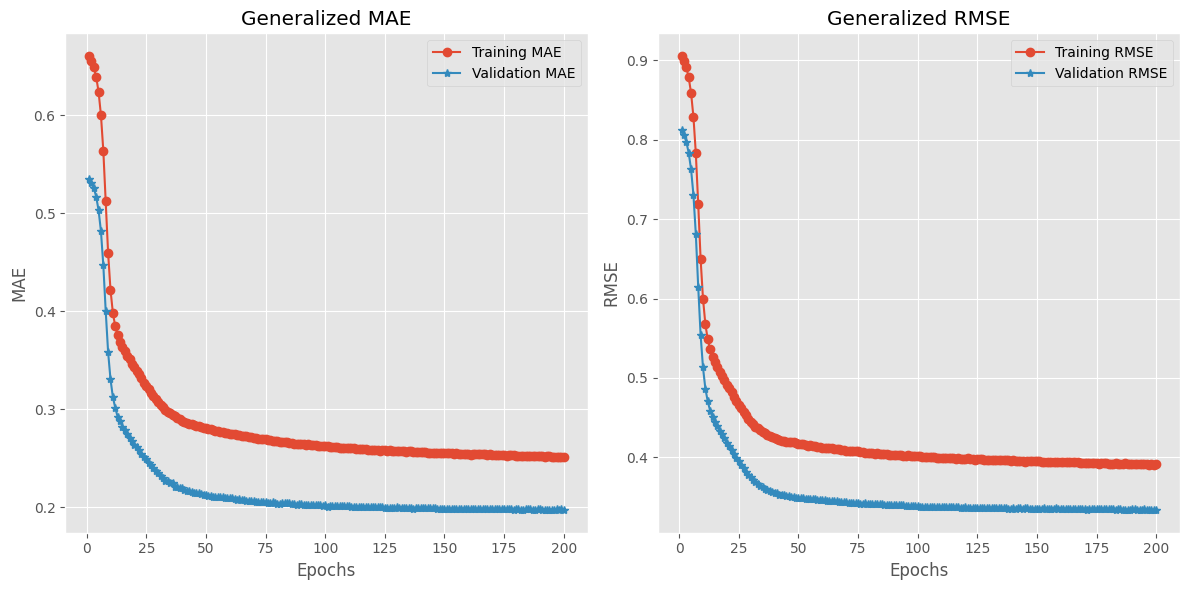

In [10]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [16]:
np.mean(list(abs_patients_errors_PHs[6].values()))

13.382467457418763

In [12]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = patient_mae
    mean_ph.append(np.mean(list(patient_mae.values())))
    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break
abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,6
559,10.971056
563,14.414518
570,9.977512
575,14.054930
588,14.829442
591,15.589049
540,13.272917
544,12.576156
552,12.659156
567,15.212991


In [13]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph2 = []

for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    mean_ph2.append(np.mean(list(patient_rmse.values())))
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph2
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,6
559,15.934828
563,20.346347
570,14.831830
575,22.086747
588,19.970995
591,22.102205
540,18.266848
544,17.969239
552,17.536554
567,22.080597


In [16]:
model_all_train_read =  SharedLayerModel(input_shape =input_shape , output_shape=output_shape)
model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
model_all_train_read.to(device)
model_all_train_read.eval()


C:\Users\menna\AppData\Local\Temp\ipykernel_1344\4105429283.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_all_train_read.load_state_dict(torch.load('saved_models

SharedLayerModel(
  (conv_layers): ModuleList(
    (0-11): 12 x Conv1d(1, 64, kernel_size=(4,), stride=(2,), padding=(1,), dilation=(2,))
  )
  (shared_lstm): GRU(64, 128, batch_first=True)
  (personalized_fc): ModuleList(
    (0-11): 12 x Linear(in_features=128, out_features=64, bias=True)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=768, out_features=12, bias=True)
)

In [75]:
# df = pd.read_csv("data\\ohio-data\\processed\\2018\\test\\559_testing.csv")
# # df['value']
# X, y = prepare_time_series_data(df, 'value', window_size, prediction_horizon)

In [76]:
# plt.figure(figsize=(13,5))
# plt.plot(np.arange(len(df['value'])), df['value'])

In [17]:
_, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon = 6,
                                                                                    model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


Shape of X (features): (12, 13618, 6)
Shape of y (targets): (12, 13618)
Shape of X_test (features): (12, 3939, 6)
Shape of y_test (targets): (12, 3939)


In [18]:
# outputs = []
# targets = []
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     for inputs, target in test_loader:
#         # Move data to device (GPU or CPU) 
#         inputs = [inp for inp in inputs]
#         # inputs = torch.tensor(np.array(inputs)).to(device)
#         inputs = torch.tensor(np.array(inputs))

#         # target = target.to(device)
#         # print(targets[0])
#         # print(targets)
#         # Forward pass
#         output = model_all_train_read(inputs)
#         outputs.append(output)
#         targets.append(target)

In [19]:
outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [20]:
outputs = torch.cat(outputs_all_batches, dim=0)
targets = torch.cat(targets_all_batches, dim=0)

outputs = outputs.cpu()
targets = targets.cpu()
# Create a mask where arr1 equals 0


In [21]:
mask = (targets == 0.0)

# Set elements to None (or np.nan for float compatibility)
targets = np.where(mask, None, targets)
outputs = np.where(mask, None, outputs)

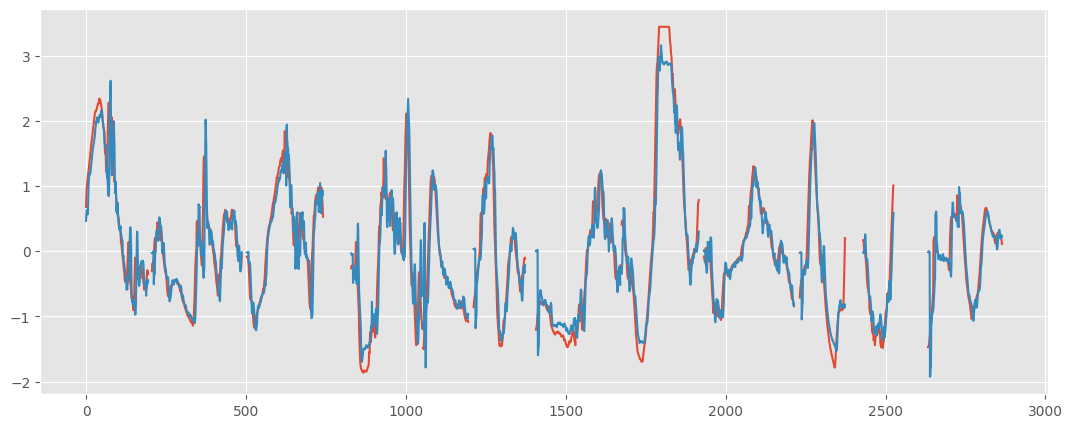

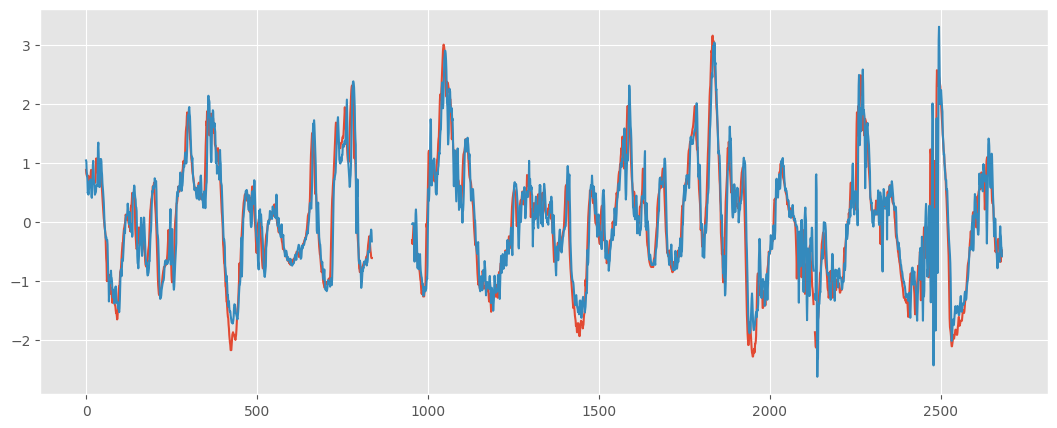

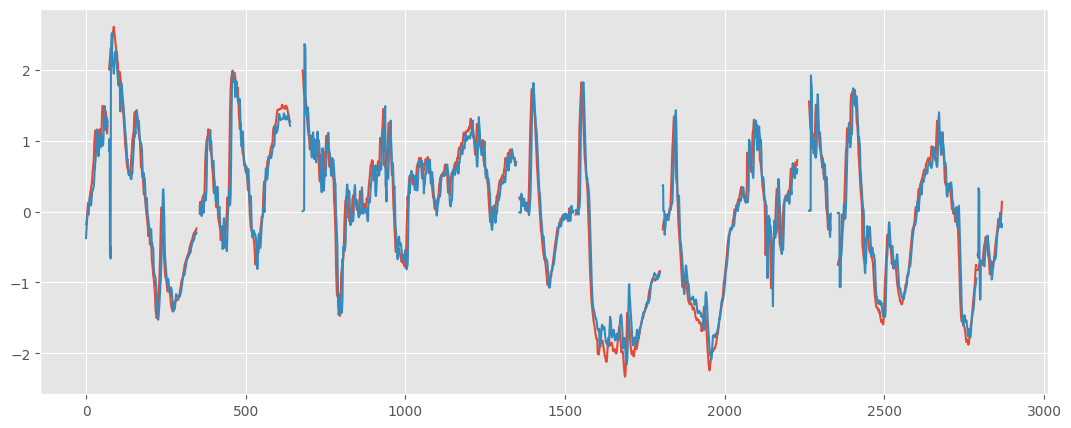

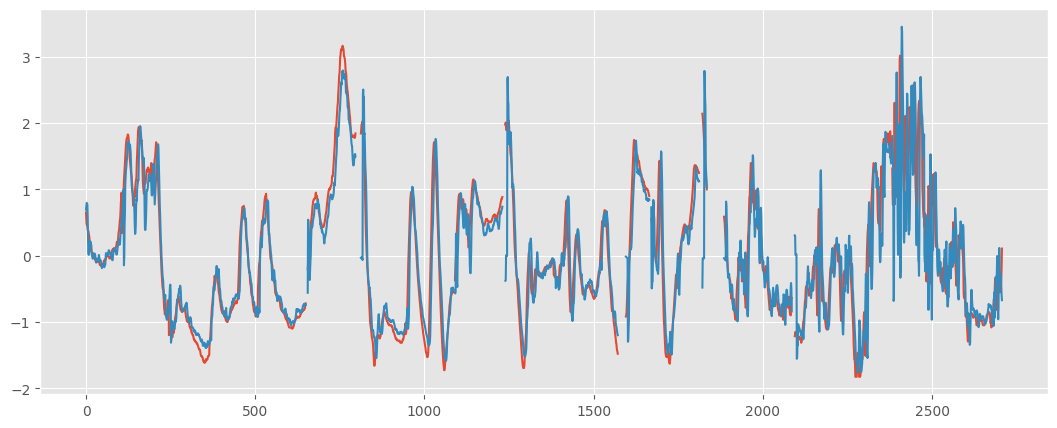

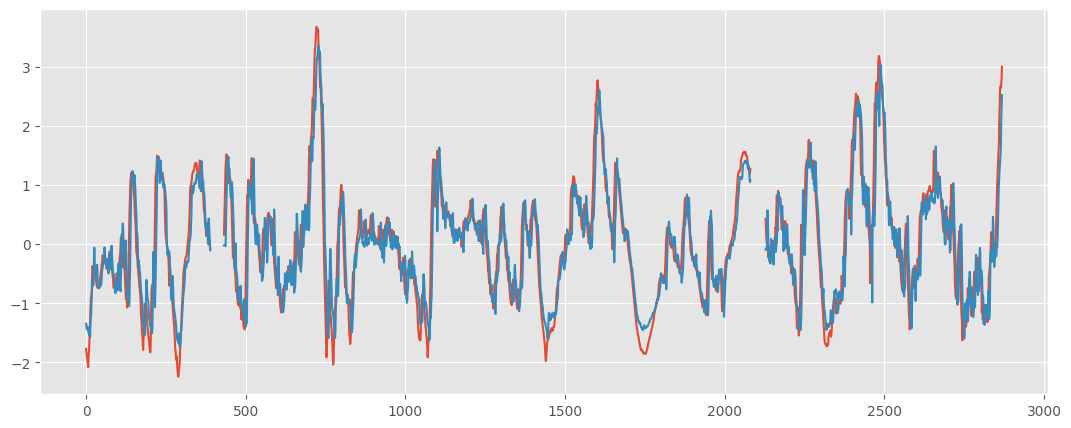

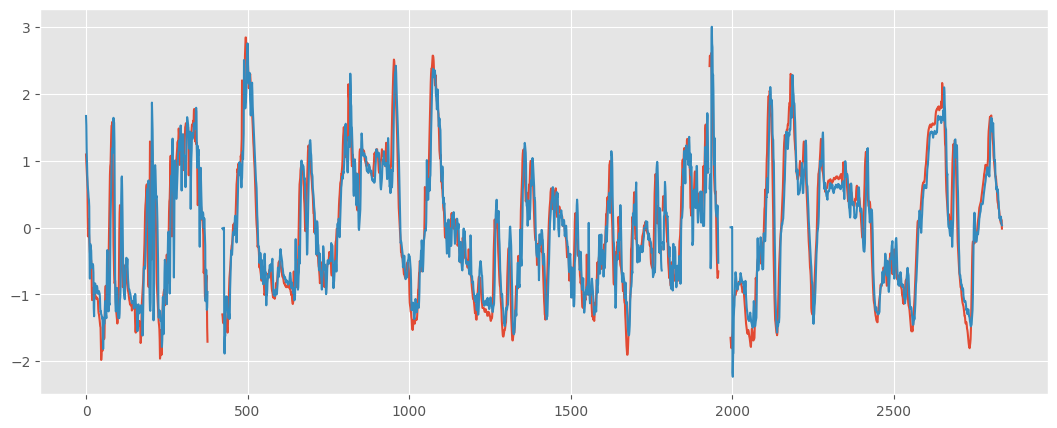

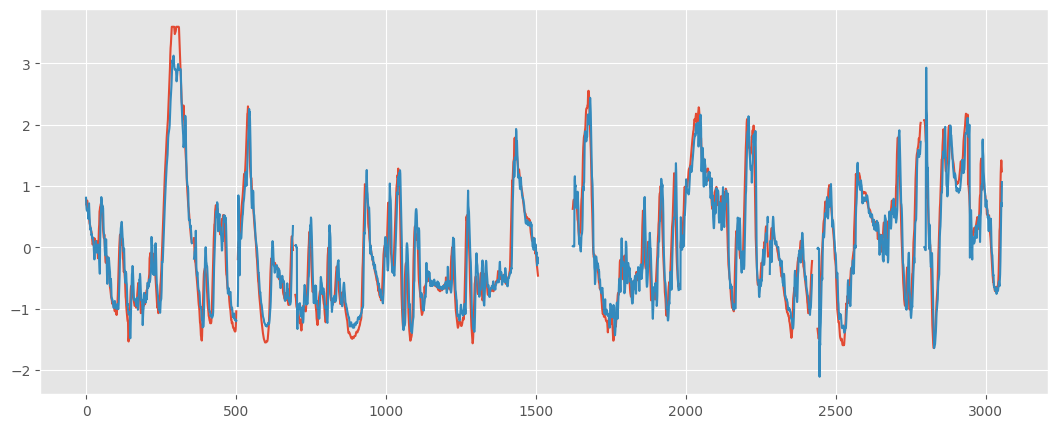

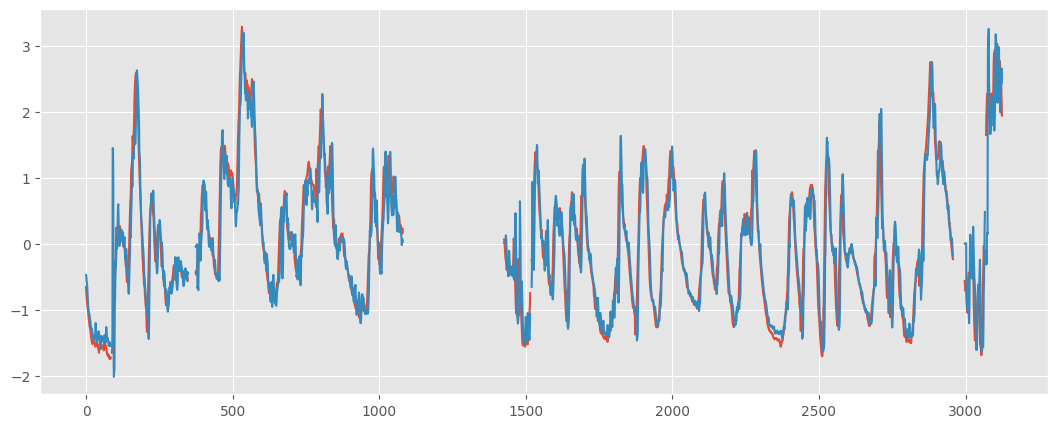

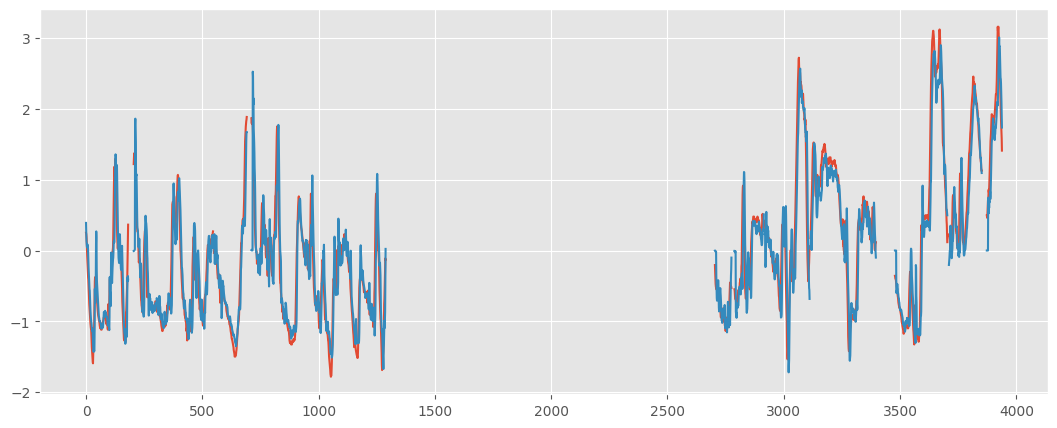

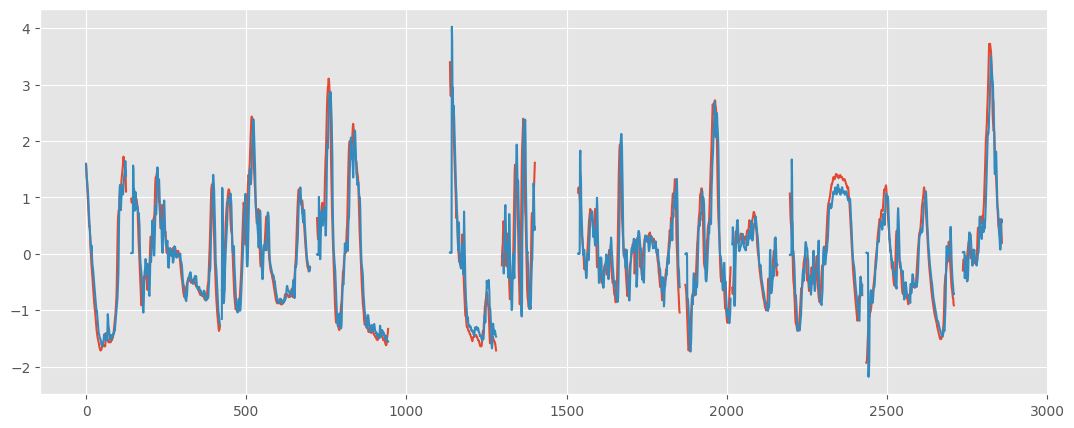

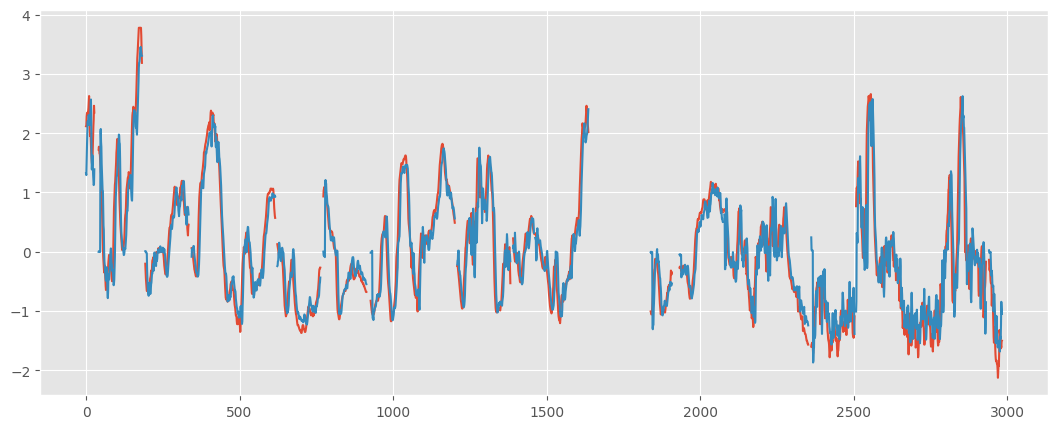

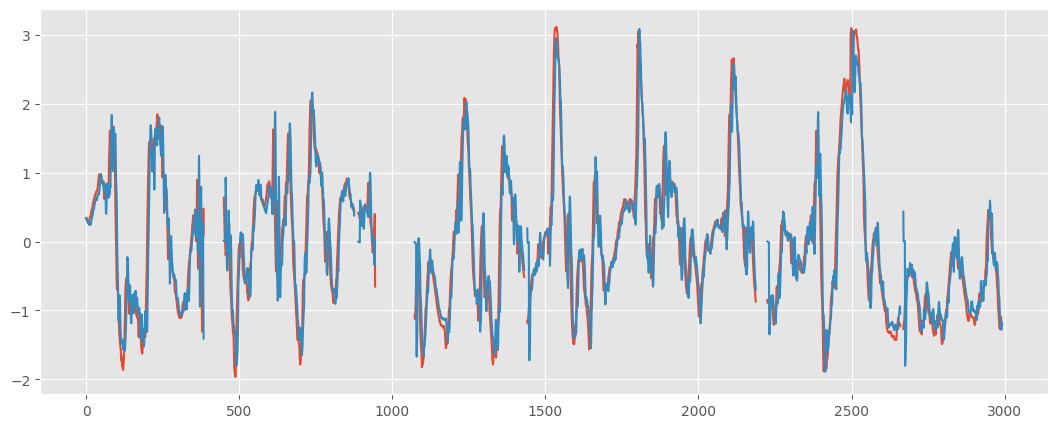

In [22]:
# index =4
for index in range(12):
    patient1_target = [sublist[index] for sublist in targets]
    patient1_output = [sublist[index]  for sublist in outputs]
    # patient1_output = outputs_all_batches[index]
    # patient1_target = targets_all_batches[index]

    # print(list(abs_patients_errors_PHs[6].values())[index])
    # print(list(squared_patients_errors_PHs[6].values())[index])

    plt.figure(figsize=(13,5))
    plt.plot(patient1_target)
    plt.plot(patient1_output)
    plt.show()

In [280]:
mae, rmse, each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, 

In [ ]:
squared_patients_errors_PHs_df = pd.DataFrame()
for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = list(RMSE_Patients_PHs.values())
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

In [247]:
# test_list = [(patient1_target[i] - patient1_output[i])**2 if type(patient1_target[i]) != type(None) else None for i in range(len(patient1_target))]
# filtered_data = [x for x in test_list if x is not None]
# np.sqrt(np.mean(filtered_data))

In [20]:
summary(model, input_size=[(64, 1), (64, 1)])

Shape before output layer: torch.Size([2, 128])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 30]             320
               GRU-2  [[-1, 30, 128], [-1, 2, 128]]               0
            Conv1d-3               [-1, 64, 30]             320
               GRU-4  [[-1, 30, 128], [-1, 2, 128]]               0
            Linear-5                   [-1, 64]           8,256
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 64]           8,256
           Dropout-8                   [-1, 64]               0
            Linear-9                   [-1, 12]           1,548
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 14.97
Params size (MB): 0.07
Estimated Total Size

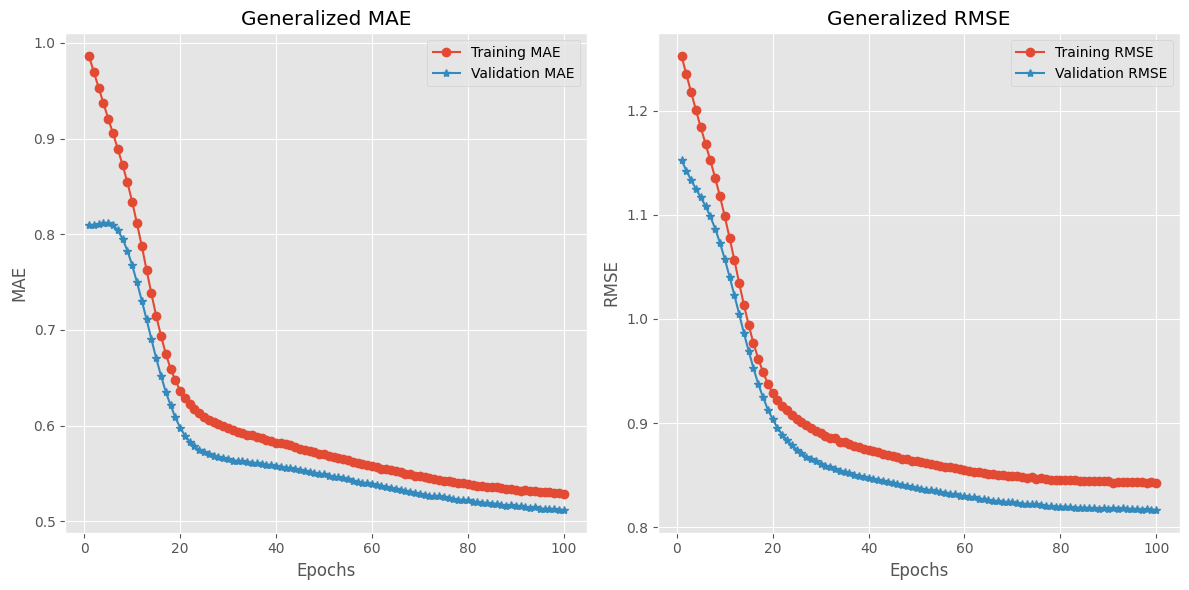

In [10]:
plot_loss_curves(history)

In [12]:
model_all_train = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
model_all_train = model_all_train.to(device)
model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=100, learning_rate=0.00001, model_type = 'shared-layer')

Epoch 1/100: 100%|██████████| 213/213 [00:11<00:00, 18.93batch/s, mae_loss=0.873]


Epoch [1/100], Training MAE: 0.9355, Training RMSE: 1.2276
Epoch [1/100], Validation MAE: 0.7535, Validation RMSE: 1.0902


Epoch 2/100: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.908]


Epoch [2/100], Training MAE: 0.9187, Training RMSE: 1.2079
Epoch [2/100], Validation MAE: 0.7512, Validation RMSE: 1.0770


Epoch 3/100: 100%|██████████| 213/213 [00:12<00:00, 17.67batch/s, mae_loss=0.905]


Epoch [3/100], Training MAE: 0.9019, Training RMSE: 1.1885
Epoch [3/100], Validation MAE: 0.7469, Validation RMSE: 1.0636


Epoch 4/100: 100%|██████████| 213/213 [00:11<00:00, 18.14batch/s, mae_loss=0.879]


Epoch [4/100], Training MAE: 0.8839, Training RMSE: 1.1679
Epoch [4/100], Validation MAE: 0.7402, Validation RMSE: 1.0491


Epoch 5/100: 100%|██████████| 213/213 [00:11<00:00, 18.16batch/s, mae_loss=0.83] 


Epoch [5/100], Training MAE: 0.8637, Training RMSE: 1.1460
Epoch [5/100], Validation MAE: 0.7284, Validation RMSE: 1.0323


Epoch 6/100: 100%|██████████| 213/213 [00:11<00:00, 18.74batch/s, mae_loss=0.875]


Epoch [6/100], Training MAE: 0.8405, Training RMSE: 1.1222
Epoch [6/100], Validation MAE: 0.7098, Validation RMSE: 1.0114


Epoch 7/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.788]


Epoch [7/100], Training MAE: 0.8129, Training RMSE: 1.0947
Epoch [7/100], Validation MAE: 0.6860, Validation RMSE: 0.9871


Epoch 8/100: 100%|██████████| 213/213 [00:11<00:00, 18.25batch/s, mae_loss=0.759]


Epoch [8/100], Training MAE: 0.7805, Training RMSE: 1.0640
Epoch [8/100], Validation MAE: 0.6578, Validation RMSE: 0.9600


Epoch 9/100: 100%|██████████| 213/213 [00:11<00:00, 18.49batch/s, mae_loss=0.727]


Epoch [9/100], Training MAE: 0.7453, Training RMSE: 1.0321
Epoch [9/100], Validation MAE: 0.6258, Validation RMSE: 0.9309


Epoch 10/100: 100%|██████████| 213/213 [00:13<00:00, 15.51batch/s, mae_loss=0.682]


Epoch [10/100], Training MAE: 0.7094, Training RMSE: 1.0009
Epoch [10/100], Validation MAE: 0.5958, Validation RMSE: 0.9043


Epoch 11/100: 100%|██████████| 213/213 [00:11<00:00, 18.52batch/s, mae_loss=0.68] 


Epoch [11/100], Training MAE: 0.6759, Training RMSE: 0.9721
Epoch [11/100], Validation MAE: 0.5681, Validation RMSE: 0.8806


Epoch 12/100: 100%|██████████| 213/213 [00:11<00:00, 18.93batch/s, mae_loss=0.588]


Epoch [12/100], Training MAE: 0.6482, Training RMSE: 0.9495
Epoch [12/100], Validation MAE: 0.5465, Validation RMSE: 0.8625


Epoch 13/100: 100%|██████████| 213/213 [00:11<00:00, 17.78batch/s, mae_loss=0.588]


Epoch [13/100], Training MAE: 0.6258, Training RMSE: 0.9308
Epoch [13/100], Validation MAE: 0.5293, Validation RMSE: 0.8488


Epoch 14/100: 100%|██████████| 213/213 [00:10<00:00, 19.65batch/s, mae_loss=0.608]


Epoch [14/100], Training MAE: 0.6113, Training RMSE: 0.9190
Epoch [14/100], Validation MAE: 0.5179, Validation RMSE: 0.8400


Epoch 15/100: 100%|██████████| 213/213 [00:11<00:00, 18.89batch/s, mae_loss=0.614]


Epoch [15/100], Training MAE: 0.6007, Training RMSE: 0.9097
Epoch [15/100], Validation MAE: 0.5091, Validation RMSE: 0.8324


Epoch 16/100: 100%|██████████| 213/213 [00:11<00:00, 18.89batch/s, mae_loss=0.632]


Epoch [16/100], Training MAE: 0.5940, Training RMSE: 0.9036
Epoch [16/100], Validation MAE: 0.5047, Validation RMSE: 0.8284


Epoch 17/100: 100%|██████████| 213/213 [00:11<00:00, 18.14batch/s, mae_loss=0.547]


Epoch [17/100], Training MAE: 0.5895, Training RMSE: 0.8999
Epoch [17/100], Validation MAE: 0.5007, Validation RMSE: 0.8245


Epoch 18/100: 100%|██████████| 213/213 [00:11<00:00, 18.23batch/s, mae_loss=0.608]


Epoch [18/100], Training MAE: 0.5859, Training RMSE: 0.8966
Epoch [18/100], Validation MAE: 0.4982, Validation RMSE: 0.8211


Epoch 19/100: 100%|██████████| 213/213 [00:10<00:00, 19.39batch/s, mae_loss=0.576]


Epoch [19/100], Training MAE: 0.5833, Training RMSE: 0.8938
Epoch [19/100], Validation MAE: 0.4963, Validation RMSE: 0.8195


Epoch 20/100: 100%|██████████| 213/213 [00:10<00:00, 19.48batch/s, mae_loss=0.61] 


Epoch [20/100], Training MAE: 0.5811, Training RMSE: 0.8919
Epoch [20/100], Validation MAE: 0.4950, Validation RMSE: 0.8171


Epoch 21/100: 100%|██████████| 213/213 [00:10<00:00, 19.75batch/s, mae_loss=0.549]


Epoch [21/100], Training MAE: 0.5784, Training RMSE: 0.8888
Epoch [21/100], Validation MAE: 0.4932, Validation RMSE: 0.8149


Epoch 22/100: 100%|██████████| 213/213 [00:11<00:00, 19.18batch/s, mae_loss=0.576]


Epoch [22/100], Training MAE: 0.5772, Training RMSE: 0.8876
Epoch [22/100], Validation MAE: 0.4917, Validation RMSE: 0.8141


Epoch 23/100: 100%|██████████| 213/213 [00:11<00:00, 18.69batch/s, mae_loss=0.525]


Epoch [23/100], Training MAE: 0.5747, Training RMSE: 0.8859
Epoch [23/100], Validation MAE: 0.4911, Validation RMSE: 0.8137


Epoch 24/100: 100%|██████████| 213/213 [00:11<00:00, 17.77batch/s, mae_loss=0.543]


Epoch [24/100], Training MAE: 0.5732, Training RMSE: 0.8849
Epoch [24/100], Validation MAE: 0.4888, Validation RMSE: 0.8111


Epoch 25/100: 100%|██████████| 213/213 [00:11<00:00, 18.85batch/s, mae_loss=0.561]


Epoch [25/100], Training MAE: 0.5723, Training RMSE: 0.8840
Epoch [25/100], Validation MAE: 0.4880, Validation RMSE: 0.8106


Epoch 26/100: 100%|██████████| 213/213 [00:11<00:00, 18.48batch/s, mae_loss=0.609]


Epoch [26/100], Training MAE: 0.5704, Training RMSE: 0.8824
Epoch [26/100], Validation MAE: 0.4863, Validation RMSE: 0.8094


Epoch 27/100: 100%|██████████| 213/213 [00:11<00:00, 19.19batch/s, mae_loss=0.574]


Epoch [27/100], Training MAE: 0.5686, Training RMSE: 0.8810
Epoch [27/100], Validation MAE: 0.4852, Validation RMSE: 0.8080


Epoch 28/100: 100%|██████████| 213/213 [00:12<00:00, 17.70batch/s, mae_loss=0.584]


Epoch [28/100], Training MAE: 0.5659, Training RMSE: 0.8783
Epoch [28/100], Validation MAE: 0.4825, Validation RMSE: 0.8064


Epoch 29/100: 100%|██████████| 213/213 [00:11<00:00, 18.81batch/s, mae_loss=0.599]


Epoch [29/100], Training MAE: 0.5654, Training RMSE: 0.8787
Epoch [29/100], Validation MAE: 0.4820, Validation RMSE: 0.8064


Epoch 30/100: 100%|██████████| 213/213 [00:11<00:00, 18.84batch/s, mae_loss=0.532]


Epoch [30/100], Training MAE: 0.5634, Training RMSE: 0.8772
Epoch [30/100], Validation MAE: 0.4816, Validation RMSE: 0.8057


Epoch 31/100: 100%|██████████| 213/213 [00:11<00:00, 18.78batch/s, mae_loss=0.608]


Epoch [31/100], Training MAE: 0.5615, Training RMSE: 0.8753
Epoch [31/100], Validation MAE: 0.4796, Validation RMSE: 0.8042


Epoch 32/100: 100%|██████████| 213/213 [00:10<00:00, 19.57batch/s, mae_loss=0.61] 


Epoch [32/100], Training MAE: 0.5601, Training RMSE: 0.8746
Epoch [32/100], Validation MAE: 0.4779, Validation RMSE: 0.8024


Epoch 33/100: 100%|██████████| 213/213 [00:11<00:00, 18.29batch/s, mae_loss=0.572]


Epoch [33/100], Training MAE: 0.5585, Training RMSE: 0.8737
Epoch [33/100], Validation MAE: 0.4777, Validation RMSE: 0.8023


Epoch 34/100: 100%|██████████| 213/213 [00:10<00:00, 19.43batch/s, mae_loss=0.515]


Epoch [34/100], Training MAE: 0.5571, Training RMSE: 0.8728
Epoch [34/100], Validation MAE: 0.4759, Validation RMSE: 0.8011


Epoch 35/100: 100%|██████████| 213/213 [00:11<00:00, 18.99batch/s, mae_loss=0.564]


Epoch [35/100], Training MAE: 0.5559, Training RMSE: 0.8717
Epoch [35/100], Validation MAE: 0.4749, Validation RMSE: 0.8008


Epoch 36/100: 100%|██████████| 213/213 [00:10<00:00, 19.64batch/s, mae_loss=0.554]


Epoch [36/100], Training MAE: 0.5539, Training RMSE: 0.8706
Epoch [36/100], Validation MAE: 0.4734, Validation RMSE: 0.7994


Epoch 37/100: 100%|██████████| 213/213 [00:11<00:00, 19.24batch/s, mae_loss=0.57] 


Epoch [37/100], Training MAE: 0.5518, Training RMSE: 0.8695
Epoch [37/100], Validation MAE: 0.4706, Validation RMSE: 0.7971


Epoch 38/100: 100%|██████████| 213/213 [00:11<00:00, 18.55batch/s, mae_loss=0.554]


Epoch [38/100], Training MAE: 0.5502, Training RMSE: 0.8679
Epoch [38/100], Validation MAE: 0.4690, Validation RMSE: 0.7967


Epoch 39/100: 100%|██████████| 213/213 [00:11<00:00, 19.10batch/s, mae_loss=0.533]


Epoch [39/100], Training MAE: 0.5492, Training RMSE: 0.8676
Epoch [39/100], Validation MAE: 0.4687, Validation RMSE: 0.7957


Epoch 40/100: 100%|██████████| 213/213 [00:10<00:00, 19.63batch/s, mae_loss=0.524]


Epoch [40/100], Training MAE: 0.5470, Training RMSE: 0.8660
Epoch [40/100], Validation MAE: 0.4681, Validation RMSE: 0.7959


Epoch 41/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.514]


Epoch [41/100], Training MAE: 0.5453, Training RMSE: 0.8650
Epoch [41/100], Validation MAE: 0.4654, Validation RMSE: 0.7935


Epoch 42/100: 100%|██████████| 213/213 [00:11<00:00, 19.14batch/s, mae_loss=0.539]


Epoch [42/100], Training MAE: 0.5445, Training RMSE: 0.8644
Epoch [42/100], Validation MAE: 0.4645, Validation RMSE: 0.7936


Epoch 43/100: 100%|██████████| 213/213 [00:11<00:00, 18.40batch/s, mae_loss=0.528]


Epoch [43/100], Training MAE: 0.5423, Training RMSE: 0.8635
Epoch [43/100], Validation MAE: 0.4629, Validation RMSE: 0.7923


Epoch 44/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.593]


Epoch [44/100], Training MAE: 0.5412, Training RMSE: 0.8630
Epoch [44/100], Validation MAE: 0.4620, Validation RMSE: 0.7926


Epoch 45/100: 100%|██████████| 213/213 [00:10<00:00, 19.62batch/s, mae_loss=0.499]


Epoch [45/100], Training MAE: 0.5396, Training RMSE: 0.8616
Epoch [45/100], Validation MAE: 0.4600, Validation RMSE: 0.7903


Epoch 46/100: 100%|██████████| 213/213 [00:11<00:00, 19.20batch/s, mae_loss=0.538]


Epoch [46/100], Training MAE: 0.5379, Training RMSE: 0.8606
Epoch [46/100], Validation MAE: 0.4591, Validation RMSE: 0.7907


Epoch 47/100: 100%|██████████| 213/213 [00:11<00:00, 18.86batch/s, mae_loss=0.576]


Epoch [47/100], Training MAE: 0.5366, Training RMSE: 0.8599
Epoch [47/100], Validation MAE: 0.4572, Validation RMSE: 0.7891


Epoch 48/100: 100%|██████████| 213/213 [00:11<00:00, 18.19batch/s, mae_loss=0.499]


Epoch [48/100], Training MAE: 0.5347, Training RMSE: 0.8596
Epoch [48/100], Validation MAE: 0.4566, Validation RMSE: 0.7891


Epoch 49/100: 100%|██████████| 213/213 [00:10<00:00, 19.57batch/s, mae_loss=0.538]


Epoch [49/100], Training MAE: 0.5333, Training RMSE: 0.8583
Epoch [49/100], Validation MAE: 0.4551, Validation RMSE: 0.7884


Epoch 50/100: 100%|██████████| 213/213 [00:11<00:00, 19.02batch/s, mae_loss=0.524]


Epoch [50/100], Training MAE: 0.5324, Training RMSE: 0.8580
Epoch [50/100], Validation MAE: 0.4535, Validation RMSE: 0.7870


Epoch 51/100: 100%|██████████| 213/213 [00:10<00:00, 19.38batch/s, mae_loss=0.513]


Epoch [51/100], Training MAE: 0.5302, Training RMSE: 0.8570
Epoch [51/100], Validation MAE: 0.4524, Validation RMSE: 0.7861


Epoch 52/100: 100%|██████████| 213/213 [00:11<00:00, 19.21batch/s, mae_loss=0.553]


Epoch [52/100], Training MAE: 0.5295, Training RMSE: 0.8572
Epoch [52/100], Validation MAE: 0.4514, Validation RMSE: 0.7858


Epoch 53/100: 100%|██████████| 213/213 [00:11<00:00, 18.80batch/s, mae_loss=0.593]


Epoch [53/100], Training MAE: 0.5275, Training RMSE: 0.8555
Epoch [53/100], Validation MAE: 0.4500, Validation RMSE: 0.7853


Epoch 54/100: 100%|██████████| 213/213 [00:11<00:00, 19.16batch/s, mae_loss=0.578]


Epoch [54/100], Training MAE: 0.5271, Training RMSE: 0.8558
Epoch [54/100], Validation MAE: 0.4489, Validation RMSE: 0.7848


Epoch 55/100: 100%|██████████| 213/213 [00:10<00:00, 19.64batch/s, mae_loss=0.533]


Epoch [55/100], Training MAE: 0.5254, Training RMSE: 0.8547
Epoch [55/100], Validation MAE: 0.4475, Validation RMSE: 0.7842


Epoch 56/100: 100%|██████████| 213/213 [00:11<00:00, 19.19batch/s, mae_loss=0.558]


Epoch [56/100], Training MAE: 0.5241, Training RMSE: 0.8546
Epoch [56/100], Validation MAE: 0.4464, Validation RMSE: 0.7850


Epoch 57/100: 100%|██████████| 213/213 [00:10<00:00, 19.69batch/s, mae_loss=0.517]


Epoch [57/100], Training MAE: 0.5236, Training RMSE: 0.8549
Epoch [57/100], Validation MAE: 0.4454, Validation RMSE: 0.7833


Epoch 58/100: 100%|██████████| 213/213 [00:11<00:00, 17.94batch/s, mae_loss=0.546]


Epoch [58/100], Training MAE: 0.5219, Training RMSE: 0.8539
Epoch [58/100], Validation MAE: 0.4440, Validation RMSE: 0.7824


Epoch 59/100: 100%|██████████| 213/213 [00:11<00:00, 19.08batch/s, mae_loss=0.533]


Epoch [59/100], Training MAE: 0.5212, Training RMSE: 0.8542
Epoch [59/100], Validation MAE: 0.4437, Validation RMSE: 0.7829


Epoch 60/100: 100%|██████████| 213/213 [00:10<00:00, 19.40batch/s, mae_loss=0.5]  


Epoch [60/100], Training MAE: 0.5203, Training RMSE: 0.8528
Epoch [60/100], Validation MAE: 0.4423, Validation RMSE: 0.7821


Epoch 61/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.503]


Epoch [61/100], Training MAE: 0.5196, Training RMSE: 0.8530
Epoch [61/100], Validation MAE: 0.4415, Validation RMSE: 0.7818


Epoch 62/100: 100%|██████████| 213/213 [00:10<00:00, 19.58batch/s, mae_loss=0.487]


Epoch [62/100], Training MAE: 0.5191, Training RMSE: 0.8531
Epoch [62/100], Validation MAE: 0.4408, Validation RMSE: 0.7809


Epoch 63/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.567]


Epoch [63/100], Training MAE: 0.5182, Training RMSE: 0.8529
Epoch [63/100], Validation MAE: 0.4402, Validation RMSE: 0.7814


Epoch 64/100: 100%|██████████| 213/213 [00:10<00:00, 19.70batch/s, mae_loss=0.543]


Epoch [64/100], Training MAE: 0.5167, Training RMSE: 0.8517
Epoch [64/100], Validation MAE: 0.4396, Validation RMSE: 0.7814


Epoch 65/100: 100%|██████████| 213/213 [00:11<00:00, 19.12batch/s, mae_loss=0.526]


Epoch [65/100], Training MAE: 0.5162, Training RMSE: 0.8523
Epoch [65/100], Validation MAE: 0.4385, Validation RMSE: 0.7804


Epoch 66/100: 100%|██████████| 213/213 [00:10<00:00, 19.41batch/s, mae_loss=0.501]


Epoch [66/100], Training MAE: 0.5160, Training RMSE: 0.8523
Epoch [66/100], Validation MAE: 0.4380, Validation RMSE: 0.7814


Epoch 67/100: 100%|██████████| 213/213 [00:11<00:00, 19.32batch/s, mae_loss=0.429]


Epoch [67/100], Training MAE: 0.5154, Training RMSE: 0.8524
Epoch [67/100], Validation MAE: 0.4375, Validation RMSE: 0.7807


Epoch 68/100: 100%|██████████| 213/213 [00:11<00:00, 18.87batch/s, mae_loss=0.523]


Epoch [68/100], Training MAE: 0.5147, Training RMSE: 0.8516
Epoch [68/100], Validation MAE: 0.4359, Validation RMSE: 0.7796


Epoch 69/100: 100%|██████████| 213/213 [00:11<00:00, 19.17batch/s, mae_loss=0.492]


Epoch [69/100], Training MAE: 0.5140, Training RMSE: 0.8521
Epoch [69/100], Validation MAE: 0.4352, Validation RMSE: 0.7798


Epoch 70/100: 100%|██████████| 213/213 [00:10<00:00, 19.60batch/s, mae_loss=0.544]


Epoch [70/100], Training MAE: 0.5135, Training RMSE: 0.8515
Epoch [70/100], Validation MAE: 0.4344, Validation RMSE: 0.7797


Epoch 71/100: 100%|██████████| 213/213 [00:12<00:00, 16.42batch/s, mae_loss=0.506]


Epoch [71/100], Training MAE: 0.5131, Training RMSE: 0.8517
Epoch [71/100], Validation MAE: 0.4340, Validation RMSE: 0.7786


Epoch 72/100: 100%|██████████| 213/213 [00:11<00:00, 18.59batch/s, mae_loss=0.524]


Epoch [72/100], Training MAE: 0.5127, Training RMSE: 0.8520
Epoch [72/100], Validation MAE: 0.4337, Validation RMSE: 0.7793


Epoch 73/100: 100%|██████████| 213/213 [00:12<00:00, 17.44batch/s, mae_loss=0.523]


Epoch [73/100], Training MAE: 0.5120, Training RMSE: 0.8516
Epoch [73/100], Validation MAE: 0.4338, Validation RMSE: 0.7797


Epoch 74/100: 100%|██████████| 213/213 [00:11<00:00, 18.42batch/s, mae_loss=0.471]


Epoch [74/100], Training MAE: 0.5119, Training RMSE: 0.8519
Epoch [74/100], Validation MAE: 0.4329, Validation RMSE: 0.7794


Epoch 75/100: 100%|██████████| 213/213 [00:11<00:00, 18.83batch/s, mae_loss=0.496]


Epoch [75/100], Training MAE: 0.5113, Training RMSE: 0.8518
Epoch [75/100], Validation MAE: 0.4323, Validation RMSE: 0.7795


Epoch 76/100: 100%|██████████| 213/213 [00:13<00:00, 15.71batch/s, mae_loss=0.486]


Epoch [76/100], Training MAE: 0.5112, Training RMSE: 0.8517
Epoch [76/100], Validation MAE: 0.4320, Validation RMSE: 0.7798


Epoch 77/100: 100%|██████████| 213/213 [00:13<00:00, 15.59batch/s, mae_loss=0.604]


Epoch [77/100], Training MAE: 0.5107, Training RMSE: 0.8519
Epoch [77/100], Validation MAE: 0.4321, Validation RMSE: 0.7787


Epoch 78/100: 100%|██████████| 213/213 [00:12<00:00, 16.62batch/s, mae_loss=0.473]


Epoch [78/100], Training MAE: 0.5100, Training RMSE: 0.8507
Epoch [78/100], Validation MAE: 0.4307, Validation RMSE: 0.7786


Epoch 79/100: 100%|██████████| 213/213 [00:11<00:00, 18.55batch/s, mae_loss=0.552]


Epoch [79/100], Training MAE: 0.5100, Training RMSE: 0.8518
Epoch [79/100], Validation MAE: 0.4304, Validation RMSE: 0.7788


Epoch 80/100: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.562]


Epoch [80/100], Training MAE: 0.5099, Training RMSE: 0.8520
Epoch [80/100], Validation MAE: 0.4302, Validation RMSE: 0.7789


Epoch 81/100: 100%|██████████| 213/213 [00:11<00:00, 18.61batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.5099, Training RMSE: 0.8515
Epoch [81/100], Validation MAE: 0.4301, Validation RMSE: 0.7793


Epoch 82/100: 100%|██████████| 213/213 [00:11<00:00, 18.40batch/s, mae_loss=0.519]


Epoch [82/100], Training MAE: 0.5090, Training RMSE: 0.8512
Epoch [82/100], Validation MAE: 0.4299, Validation RMSE: 0.7796


Epoch 83/100: 100%|██████████| 213/213 [00:11<00:00, 18.06batch/s, mae_loss=0.504]


Epoch [83/100], Training MAE: 0.5090, Training RMSE: 0.8520
Epoch [83/100], Validation MAE: 0.4288, Validation RMSE: 0.7779


Epoch 84/100: 100%|██████████| 213/213 [00:11<00:00, 18.09batch/s, mae_loss=0.497]


Epoch [84/100], Training MAE: 0.5087, Training RMSE: 0.8515
Epoch [84/100], Validation MAE: 0.4285, Validation RMSE: 0.7780


Epoch 85/100: 100%|██████████| 213/213 [00:11<00:00, 17.93batch/s, mae_loss=0.533]


Epoch [85/100], Training MAE: 0.5085, Training RMSE: 0.8516
Epoch [85/100], Validation MAE: 0.4291, Validation RMSE: 0.7783


Epoch 86/100: 100%|██████████| 213/213 [00:11<00:00, 18.63batch/s, mae_loss=0.523]


Epoch [86/100], Training MAE: 0.5081, Training RMSE: 0.8512
Epoch [86/100], Validation MAE: 0.4291, Validation RMSE: 0.7792


Epoch 87/100: 100%|██████████| 213/213 [00:11<00:00, 17.94batch/s, mae_loss=0.492]


Epoch [87/100], Training MAE: 0.5081, Training RMSE: 0.8513
Epoch [87/100], Validation MAE: 0.4287, Validation RMSE: 0.7785


Epoch 88/100: 100%|██████████| 213/213 [00:11<00:00, 18.65batch/s, mae_loss=0.474]


Epoch [88/100], Training MAE: 0.5081, Training RMSE: 0.8512
Epoch [88/100], Validation MAE: 0.4283, Validation RMSE: 0.7792


Epoch 89/100: 100%|██████████| 213/213 [00:11<00:00, 18.19batch/s, mae_loss=0.496]


Epoch [89/100], Training MAE: 0.5074, Training RMSE: 0.8516
Epoch [89/100], Validation MAE: 0.4282, Validation RMSE: 0.7783


Epoch 90/100: 100%|██████████| 213/213 [00:11<00:00, 18.48batch/s, mae_loss=0.472]


Epoch [90/100], Training MAE: 0.5075, Training RMSE: 0.8511
Epoch [90/100], Validation MAE: 0.4286, Validation RMSE: 0.7787


Epoch 91/100: 100%|██████████| 213/213 [00:11<00:00, 18.11batch/s, mae_loss=0.549]


Epoch [91/100], Training MAE: 0.5070, Training RMSE: 0.8507
Epoch [91/100], Validation MAE: 0.4276, Validation RMSE: 0.7777


Epoch 92/100: 100%|██████████| 213/213 [00:11<00:00, 17.82batch/s, mae_loss=0.474]


Epoch [92/100], Training MAE: 0.5070, Training RMSE: 0.8512
Epoch [92/100], Validation MAE: 0.4277, Validation RMSE: 0.7781


Epoch 93/100: 100%|██████████| 213/213 [00:11<00:00, 18.28batch/s, mae_loss=0.488]


Epoch [93/100], Training MAE: 0.5068, Training RMSE: 0.8507
Epoch [93/100], Validation MAE: 0.4275, Validation RMSE: 0.7786


Epoch 94/100: 100%|██████████| 213/213 [00:11<00:00, 18.52batch/s, mae_loss=0.497]


Epoch [94/100], Training MAE: 0.5067, Training RMSE: 0.8509
Epoch [94/100], Validation MAE: 0.4280, Validation RMSE: 0.7790


Epoch 95/100: 100%|██████████| 213/213 [00:11<00:00, 18.09batch/s, mae_loss=0.492]


Epoch [95/100], Training MAE: 0.5062, Training RMSE: 0.8510
Epoch [95/100], Validation MAE: 0.4272, Validation RMSE: 0.7791


Epoch 96/100: 100%|██████████| 213/213 [00:11<00:00, 18.77batch/s, mae_loss=0.449]


Epoch [96/100], Training MAE: 0.5061, Training RMSE: 0.8509
Epoch [96/100], Validation MAE: 0.4266, Validation RMSE: 0.7778


Epoch 97/100: 100%|██████████| 213/213 [00:12<00:00, 17.34batch/s, mae_loss=0.456]


Epoch [97/100], Training MAE: 0.5060, Training RMSE: 0.8506
Epoch [97/100], Validation MAE: 0.4273, Validation RMSE: 0.7794


Epoch 98/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.501]


Epoch [98/100], Training MAE: 0.5052, Training RMSE: 0.8500
Epoch [98/100], Validation MAE: 0.4269, Validation RMSE: 0.7789


Epoch 99/100: 100%|██████████| 213/213 [00:11<00:00, 18.27batch/s, mae_loss=0.524]


Epoch [99/100], Training MAE: 0.5058, Training RMSE: 0.8509
Epoch [99/100], Validation MAE: 0.4268, Validation RMSE: 0.7781


Epoch 100/100: 100%|██████████| 213/213 [00:11<00:00, 18.50batch/s, mae_loss=0.539]


Epoch [100/100], Training MAE: 0.5056, Training RMSE: 0.8507
Epoch [100/100], Validation MAE: 0.4268, Validation RMSE: 0.7791


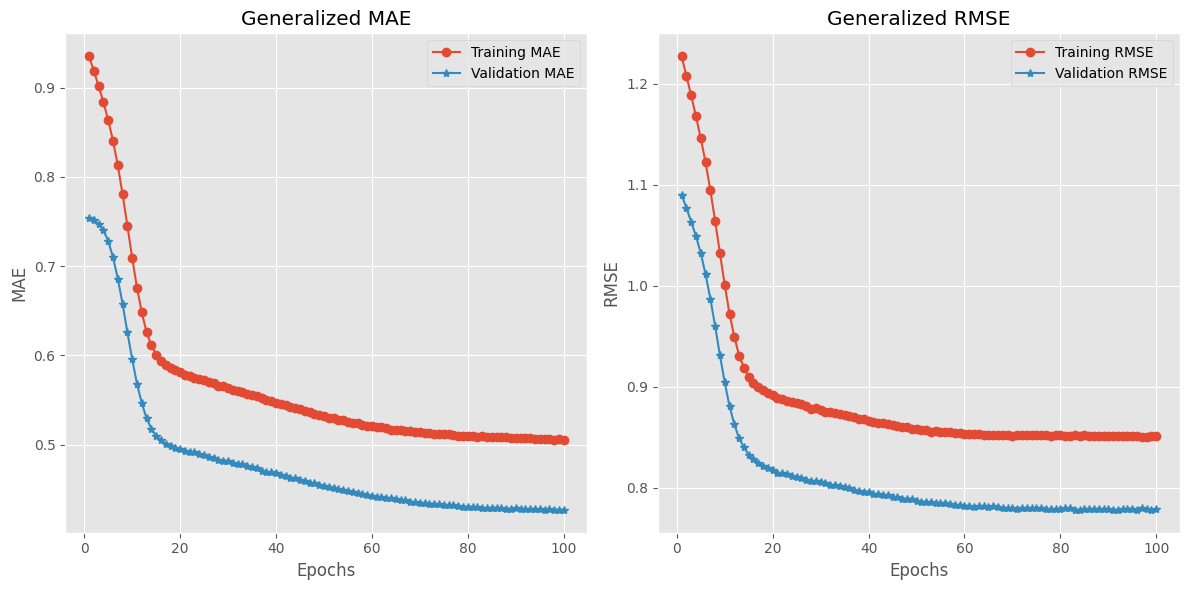

In [13]:
plot_loss_curves(history2)

In [17]:
model_all_train.eval()
abs_patients_errors, squared_patients_errors= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


In [10]:
# model_all_train.eval()  # Set the model to evaluation mode
# criterion = nn.MSELoss(reduction='none')  # MSE without reduction (so we can manually exclude masked values)
# running_test_loss = 0.0
# valid_preds = []
# valid_targets = []
# mask_value = -2.5
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model_all_train = model_all_train.to(device)
# rmse_patients_errors = {}
# mae_patients_errors = {}
# abs_patients_errors =  {key: [] for key in range(13)}
# squared_patients_errors =  {key: [] for key in range(13)}

# i=0
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     for inputs, targets in test_loader:
#         i+=1
#         # Move data to device (GPU or CPU)
#         inputs = [inp.to(device) for inp in inputs]
#         targets = targets.to(device)
#         # print(targets[0])
#         # print(targets)
#         # Forward pass
#         outputs = model_all_train(inputs)
        
#         # # # Convert to numpy arrays for masking
#         outputs_np = outputs.cpu().numpy()
#         targets_np = targets.cpu().numpy()

#         for i in range(len(targets_np)): #this prints a list of 12 values of each patient
#             for j in range(len(targets_np[i])):
#                 if targets[i][j] != mask_value:
#                     sub_output = scaler.inverse_transform([[outputs_np[i][j]]])[0][0]
#                     sub_target = scaler.inverse_transform([[targets_np[i][j]]])[0][0]
#                     abs_patients_errors[j].append(abs(sub_output-sub_target))
#                     squared_patients_errors[j].append((sub_output-sub_target) ** 2)

In [19]:
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']
all_mae = []
all_rmse = []
for i in range(len(squared_patients_errors)-1):
    mae = np.mean(abs_patients_errors[i])
    rmse = np.sqrt(np.mean(squared_patients_errors[i]))
    all_mae.append(mae)
    all_rmse.append(rmse)
    print(f"{patients_list[i]}: RMSE: {rmse}, MAE: {mae}")
print(f"Average MAE: {np.mean(all_mae)}")
print(f"Average RMSE: {np.mean(all_rmse)}")


559: RMSE: 10.7892878791789, MAE: 8.134491284312814
563: RMSE: 15.864988953270464, MAE: 11.104398036610315
570: RMSE: 9.44019164483062, MAE: 6.730193080202984
575: RMSE: 19.179529405238775, MAE: 12.699248476284549
588: RMSE: 17.58048117944993, MAE: 12.753819199465097
591: RMSE: 17.933122740699307, MAE: 11.547077722432409
540: RMSE: 17.069087497336614, MAE: 12.689434651280996
544: RMSE: 16.087915565477807, MAE: 11.234599046075177
552: RMSE: 16.07376161696751, MAE: 12.850701684369467
567: RMSE: 26.235300465165842, MAE: 20.656728507850154
584: RMSE: 13.308503725980527, MAE: 10.743746769954258
596: RMSE: 24.78399173571093, MAE: 19.94710747708795
Average MAE: 12.590962161327182
Average RMSE: 17.02884686744227
